<a href="https://colab.research.google.com/github/peterjsadowski/Tutorial-Microbiome/blob/main/part1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

This notebook presents an example of exploratory data analysis for metagenomic data. 

Author: Peter Sadowski

Date: Feb 19 2023


# Loading Data

For this example we use samples taken by UH Professor Anthony Amend's BOT662 class. Instructions:
1. Download file from [this link](https://drive.google.com/drive/u/0/folders/1ueHCzkohAkXOW-ZcbqDgeLr8PnQ5Rxyd) (Google login required).
1. Upload the zip file 'Class_Data_for_Phyloseq.zip' to the runtime.
1. Unzip it below.

In [ ]:
!unzip Class_Data_for_Phyloseq.zip  # Assumes file is saved locally.

We will use standard python packages to work with the data:
1. Numpy: For working with matrices and vectors. 
1. Pandas: For “relational” or “labeled” data. Similar to R.
1. Sklearn: Implements variety of machine learning models. 
1. Matplotlib: Plotting tools

In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pylab as plt

# Load data into pandas dataframe.
df = pd.read_csv('OTUs.100.rep.count_table.csv')
df = df.rename(columns={'Unnamed: 0': 'OTU'})
df = df.set_index('OTU')

meta_data = pd.read_csv('brom_meta.csv')
meta_data = meta_data.set_index('sample_name')

We can view the first few lines of the datatable with "head()"

In [ ]:
df.head()

,Unnamed: 0,EXT_NEG_LY_S21_L001,LY_BR1_D_S11_L001,LY_BR1_Detrit_S1_L001,LY_BR1_Toxo_S6_L001,LY_BR1_W1_S16_L001,LY_BR2_D_S12_L001,LY_BR2_Detrit_S2_L001,LY_BR2_Toxo_S7_L001,LY_BR2_W2_S17_L001,...,LY_BR3_W1_S18_L001,LY_BR4_D_S14_L001,LY_BR4_Detrit_S4_L001,LY_BR4_Toxo_S9_L001,LY_BR4_W1_S19_L001,LY_BR5_D_S15_L001,LY_BR5_Detrit_S5_L001,LY_BR5_Toxo_S10_L001,LY_BR5_W1_S20_L001,PCR_pos_LY_S22_L001
0,Otu0001,2,16,36,11,11689,18,53,126,24764,...,371,13,116,328,67927,24,84,5,27,2
1,Otu0002,0,1,0,16,8,2,2,33939,10,...,0,0,1,36354,33,4,0,2,1,2
2,Otu0003,0,1,3144,6,5,2,21403,4,3,...,9,0,13666,3,11,0,3041,2,0,5
3,Otu0004,0,6,8,3,51387,5,1,3,105,...,52,3,4,0,135,1,778,1,138,0
4,Otu0006,0,0,1,1,1,1,0,256,0,...,9,1,1,7,1,2,0,0,4,1


Or we can get summary statistics using describe()

In [ ]:
df.describe()

,EXT_NEG_LY_S21_L001,LY_BR1_D_S11_L001,LY_BR1_Detrit_S1_L001,LY_BR1_Toxo_S6_L001,LY_BR1_W1_S16_L001,LY_BR2_D_S12_L001,LY_BR2_Detrit_S2_L001,LY_BR2_Toxo_S7_L001,LY_BR2_W2_S17_L001,LY_BR3_D_S13_L001,...,LY_BR3_W1_S18_L001,LY_BR4_D_S14_L001,LY_BR4_Detrit_S4_L001,LY_BR4_Toxo_S9_L001,LY_BR4_W1_S19_L001,LY_BR5_D_S15_L001,LY_BR5_Detrit_S5_L001,LY_BR5_Toxo_S10_L001,LY_BR5_W1_S20_L001,PCR_pos_LY_S22_L001
count,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,...,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000,5222.000000
mean,2.102643,8.027767,8.059173,14.355802,23.550364,7.041555,10.734584,18.470318,11.106664,6.810992,...,11.577939,9.891612,13.490234,17.722329,19.446381,8.578322,14.185370,9.205285,14.628303,19.733435
std,118.577598,71.370708,121.118353,441.296764,737.015838,57.733203,312.083444,496.799396,349.305375,52.844455,...,61.678125,227.649394,243.874235,514.948951,940.550216,56.635370,151.540024,120.483475,300.388666,488.573036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,4.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,3.000000,0.000000
max,8508.000000,4034.000000,4273.000000,28564.000000,51387.000000,1820.000000,21403.000000,33939.000000,24764.000000,2299.000000,...,1652.000000,15090.000000,13666.000000,36354.000000,67927.000000,1897.000000,7512.000000,5080.000000,14607.000000,18536.000000


# Visualizing Data with Principle Component Analysis (PCA)

It is difficult to interpret raw, high-dimensional data. __Visualization__ techniques can help, but in order to visualize data we need to project data into 2-D or 3-D. There are a number of statistics and machine learning methods for performing __dimensionality reduction__ that try to summarize high-dimensional data in a semantically-meaningful low-dimensional space.

One of the most widely-used dimensionality reduction techniques is __principle component analysis (PCA)__. Given a data/design/feature matrix of N examples and D features, PCA computes a new set of D features sorted by their importance in explaining the variance of the data. Taking the top K=2 features gives us a compressed representation of our data that can be visualized in a simple plot. PCA can be a little unintuitive, but there are many good explanations of PCA online (e.g. [this](https://www.youtube.com/watch?v=kw9R0nD69OU&ab_channel=Udacity)). 

Transformed data shape: (22, 22)


Text(0, 0.5, 'PC2')

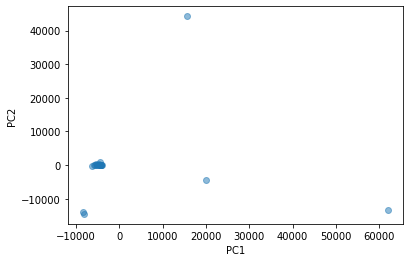

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
components = pca.fit_transform(df.T)
print(f'Transformed data shape: {components.shape}')

plt.scatter(components[:,0], components[:,1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')

This does not give us a great picture of our dataset, other than suggesting that a couple of our samples look very different from the rest. Are these really outliers? It is too soon to tell. 

Let's try transforming the data. PCA is a linear model, so it is influenced heavily by large values. Our metagenomic read counts reach large values over 100,000, while the mean over OTUs is usualy less than 10. For data like this, it is often useful to transform the data with a log function. In order to avoid taking the log of zero, we can do a log(x+1) transform.

Text(0, 0.5, 'PC2')

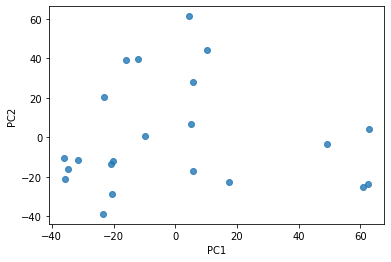

In [ ]:
pca = PCA()
components = pca.fit_transform(np.log(df + 1).T)
plt.scatter(components[:,0], components[:,1], alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')

This gives us a different picture of our data. It is _not_ equivalent to simply taking the logarithm of the axes in the previous figure, because the principle components are different.

Now let's try coloring the graph by the metadata to see if we can observe any patterns.

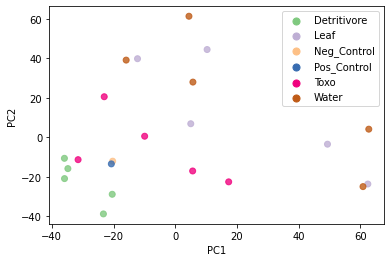

In [21]:
from sklearn.preprocessing import LabelEncoder

def assign_colors(df, meta_data, colorby='sample_type'):
  """ Assign a integer label and color to each unique value in the colorby col.
  Returns:
    labels = List of integer labels. Has length equal to len(df.columns).
    colors = List of colors. Has length equal to len(df.columns).
    label_colors = Dict mapping unique keys to colors.
  """
  labels = [meta_data.loc[[sample_name]][colorby][0]
          for sample_name in df.columns]
  encoder = LabelEncoder()
  labels_int = encoder.fit_transform(labels)
  cmap = plt.get_cmap('Accent')
  num_labels = len(np.unique(labels))
  label_colors = {label: cmap(i/num_labels) 
                  for i, label in enumerate(np.unique(labels))}
  colors = [label_colors[label] for label in labels]
  return labels, colors, label_colors

labels, colors, label_colors = assign_colors(df, meta_data, colorby='sample_type')
pca = PCA()
components = pca.fit_transform(np.log(df + 1).T)

plt.scatter(components[:,0], components[:,1], alpha=0.8, color=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Create a list of scatterplot objects for the legend
legend_scatterplots = [plt.scatter([], [], s=50, color=color, label=label)
                      for label, color in label_colors.items()]
# Add the legend to the plot
plt.legend(handles=legend_scatterplots, loc='upper right')

Interesting! The principle components definitely contain information about the sample type. We can try to consider more principle components using a 3-D visualization. The plotly library provides an interactive 3-D plot, which is very helpful when trying to visualize 3-D data.

In [68]:
import plotly.express as px

df_pca = pd.DataFrame(components,
                      columns=[f'PCA{i+1}' for i in range(df.shape[1])])

labels, colors, label_colors = assign_colors(df, meta_data, colorby='sample_type')
df_pca['sample_type'] = labels

fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3',
                  color='sample_type')
fig.show()


Let's try one more meta data feature: the bromeliad number. Since the two control samples don't have a bromeliad number (the values in the table are NaN), we need to fill in a value of zero. 

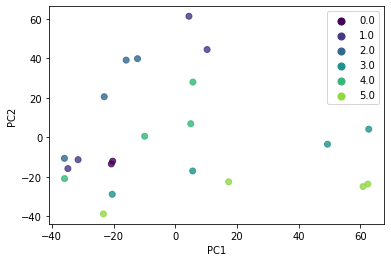

In [ ]:

colorby = 'bro_number'
# Zero-fill missing bro_numbers.
meta_data_filled = meta_data[['bro_number']].fillna(value=0)
labels = [meta_data_filled.loc[[sample_name]][colorby][0]
         for sample_name in df.columns]
encoder = LabelEncoder()
labels_int = encoder.fit_transform(labels)
cmap = plt.get_cmap('viridis')
num_labels = len(np.unique(labels))
label_colors = {label: cmap(i/num_labels) 
                for i, label in enumerate(np.unique(labels))}
colors = [label_colors[label] for label in labels]

plt.scatter(components[:,0], components[:,1], alpha=0.8, color=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Create a list of scatterplot objects for the legend
legend_scatterplots = [plt.scatter([], [], s=50, color=color, label=label)
                      for label, color in label_colors.items()]
# Add the legend to the plot
plt.legend(handles=legend_scatterplots, loc='upper right')

This seems to have some correllation too, but maybe not as much.

# Visualizing the Data with UMAP

PCA is nice because it is: (1) fast; (2) deterministic, such that the outcome is the same if you rerun the algorithm; and (3) interpretable. However, as seen in the initial attempt above, projecting the data onto the first two principle components is often uninformative. 

There are many other methods for visualizing high-dimensional data, including __multidimensional scaling (MDS)__, __t-distributed stochastic neighbor embedding (t-SNE)__, __uniform manifold approximation and projection (UMAP)__, and others. These methods have lots of tuneable parameters, and it is common to explore a dataset by trying many different approaches and using the visualizations to form hypotheses about the data. In particular, one can always produce distinct clusters from a dataset, but these clusters do not necessarily correspond to anything useful. For this reason, scientists should be wary about interpreting these visualizations. 

This section will explore UMAP, a variant of the t-SNE method that scales better to large datasets. See this [blog post](https://pair-code.github.io/understanding-umap/) by Google Research for a nice explanation. We will use the [umap-learn](https://umap-learn.readthedocs.io/en/latest/parameters.html) python library.

In [ ]:
!pip install umap-learn
import umap 

Lets try plotting our samples using the default parameters.

CPU times: user 4.42 s, sys: 23.8 ms, total: 4.44 s
Wall time: 5.62 s


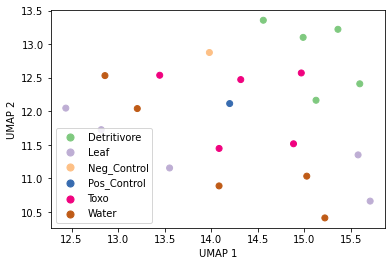

In [35]:
fit = umap.UMAP()
%time u = fit.fit_transform(np.log(1+df).T)

labels, colors, label_colors = assign_colors(df, meta_data, colorby='sample_type')

plt.scatter(u[:,0], u[:,1], color=colors)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
# Create a list of scatterplot objects for the legend
legend_scatterplots = [plt.scatter([], [], s=50, color=color, label=label)
                      for label, color in label_colors.items()]
# Add the legend to the plot
plt.legend(handles=legend_scatterplots)

By adjusting the parameters of the UMAP algorithm, we can get very different results.

CPU times: user 4.38 s, sys: 38.4 ms, total: 4.42 s
Wall time: 5.43 s


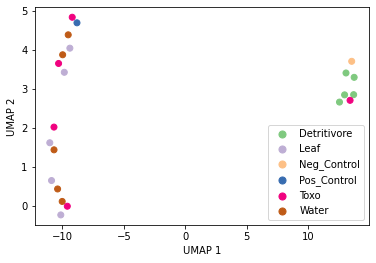

In [63]:
fit = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=2, metric='cosine')
%time u = fit.fit_transform(np.log(1+df).T)

plt.scatter(u[:,0], u[:,1], color=colors)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
# Create a list of scatterplot objects for the legend
legend_scatterplots = [plt.scatter([], [], s=50, color=color, label=label)
                      for label, color in label_colors.items()]
# Add the legend to the plot
plt.legend(handles=legend_scatterplots)

We can also do a 3-D UMAP.

In [67]:
import plotly.express as px

fit = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=3, metric='cosine')
%time u = fit.fit_transform(np.log(1+df).T)

df_umap = pd.DataFrame(u, columns=[f'UMAP{i}' for i in range(1, 4)])
df_umap['sample_type'] = labels

fig = px.scatter_3d(df_umap, x='UMAP1', y='UMAP2', z='UMAP3',
                    color='sample_type')
fig.show()

CPU times: user 3.45 s, sys: 20.2 ms, total: 3.47 s
Wall time: 5.58 s


The UMAP parameters have a large impact on the result, so if you plan to use this method it is worth familiarizing yourself with them. The [documentation](https://umap-learn.readthedocs.io/en/latest/parameters.html) has some pretty good examples to build your intuition. The parameters to consider are:
1. n_neighbors: Small values force UMAP to focus on local structure rather than the big picture. (default: 15)
2. min_dist: This parameter sets a minimum distance between points in the embedding. (default: 0.1)
3. metric: This specifies how we compute distance between points. Options for real data include: euclidean, manhattan, chebyshev, cosine. (default: 'euclidean')


In [70]:
fit = umap.UMAP(n_neighbors=10, min_dist=0.01, n_components=3, metric='manhattan')
%time u = fit.fit_transform(np.log(1+df).T)

df_umap = pd.DataFrame(u, columns=[f'UMAP{i}' for i in range(1, 4)])
df_umap['sample_type'] = labels

fig = px.scatter_3d(df_umap, x='UMAP1', y='UMAP2', z='UMAP3',
                    color='sample_type')
fig.show()

CPU times: user 4.49 s, sys: 24 ms, total: 4.52 s
Wall time: 7.47 s
